# 信息理论：
1、从信息的完整性上进行的描述:

当系统的有序状态一致时，**数据越集中的地方熵值越小，数据越分散的地方熵值越大。

2、从信息的有序性上进行的描述:

当数据量一致时，系统越有序，熵值越低；系统越混乱或者分散，熵值越高。

- 信息增益：以某特征划分数据集前后的熵的差值。熵可以表示样本集合的不确定性，熵越大，样本的不确定性就越大。因此可以使用划分前后集合熵的差值来衡量使用当前特征对于样本集合D划分效果的好坏。

- 信息增益 = entroy(前) - entroy(后)

- 定义与公式
- 特征A对训练数据集D的信息增益g(D,A),定义为集合D的信息熵H(D)与特征A给定条件下D的信息条件熵H(D|A)之差
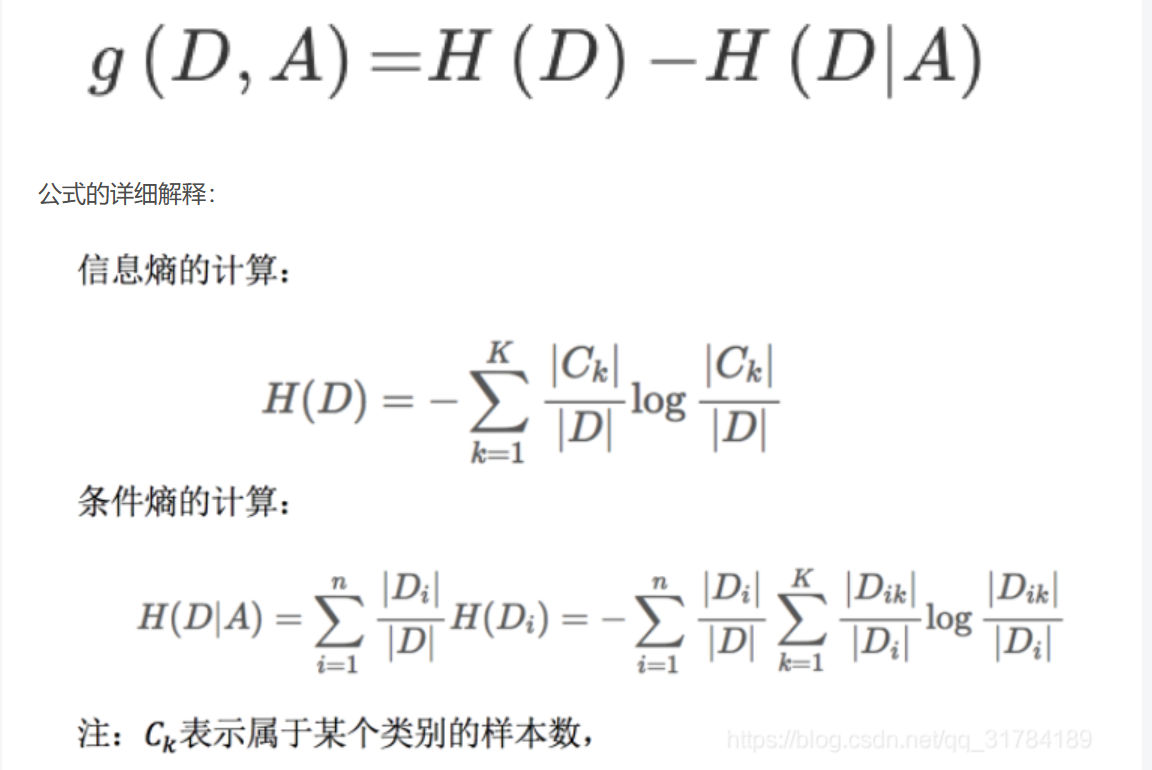

- 信息增益率
    - 增益率：增益比率度量是用前面的增益度量Gain(S，A)和所分离信息度量SplitInformation(如上例的性别，活跃度等)的比值来共同定义的。
- 基尼值Gini（D）：
    - 从数据集D中随机抽取两个样本，其类别标记不一致的概率。故，Gini（D）值越小，数据集D的纯度越高。
    - 基尼指数Gini_index（D）：一般，选择使划分后基尼系数最小的属性作为最优化分属性。

#特征提取
- 定义
     - 将任意数据（如文本或图像）转换为可用于机器学习的数字特征
     
注：特征值化是为了计算机更好的去理解数据

特征提取分类:
字典特征提取(特征离散化)
文本特征提取
图像特征提取（深度学习将介绍）

特征提取API
- sklearn.feature_extraction

# 字典特征提取
- 作用：对字典数据进行特征值化

- sklearn.feature_extraction.DictVectorizer(sparse=True,…)
    - DictVectorizer.fit_transform(X)
        - X:字典或者包含字典的迭代器返回值
        - 返回sparse矩阵
    - DictVectorizer.get_feature_names() 返回类别名称

In [1]:
[{'city': '北京','temperature':100},
{'city': '上海','temperature':60},
{'city': '深圳','temperature':30}]

[{'city': '北京', 'temperature': 100},
 {'city': '上海', 'temperature': 60},
 {'city': '深圳', 'temperature': 30}]

In [7]:
from sklearn.feature_extraction import DictVectorizer
 
def dict_demo():
    """
    对字典类型的数据进行特征抽取
    :return: None
    """
    data = [{'city': '北京','temperature':100}, {'city': '上海','temperature':60}, {'city': '深圳','temperature':30}]
    # 1、实例化一个转换器类
    transfer = DictVectorizer(sparse=False)
    # transfer = DictVectorizer()
    # 2、调用fit_transform
    data = transfer.fit_transform(data)
    print("返回的结果:\n", data)
    # 打印特征名字
    print("特征名字：\n", transfer.get_feature_names())
 
    return None

In [4]:
dict_demo()

返回的结果:
 [[  0.   1.   0. 100.]
 [  1.   0.   0.  60.]
 [  0.   0.   1.  30.]]
特征名字：
 ['city=上海', 'city=北京', 'city=深圳', 'temperature']


注意观察没有加上sparse=False参数的结果,这个结果并不是我们想要看到的，所以加上参数

In [6]:
dict_demo()

返回的结果:
   (0, 1)	1.0
  (0, 3)	100.0
  (1, 0)	1.0
  (1, 3)	60.0
  (2, 2)	1.0
  (2, 3)	30.0
特征名字：
 ['city=上海', 'city=北京', 'city=深圳', 'temperature']


# 文本特征提取
- 作用：对文本数据进行特征值化

- sklearn.feature_extraction.text.CountVectorizer(stop_words=[])

    - 返回词频矩阵
    - CountVectorizer.fit_transform(X)
        - X:文本或者包含文本字符串的可迭代对象
        - 返回值:返回sparse矩阵
    - CountVectorizer.get_feature_names() 返回值:单词列表
    - sklearn.feature_extraction.text.TfidfVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
 
def text_count_demo():
    """
    对文本进行特征抽取，countvetorizer
    :return: None
    """
    data = ["life is short,i like like python", "life is too long,i dislike python"]
    # 1、实例化一个转换器类
    # transfer = CountVectorizer(sparse=False) # 注意,没有sparse这个参数
    transfer = CountVectorizer()
    # 2、调用fit_transform
    data = transfer.fit_transform(data)
    print("文本特征抽取的结果：\n", data.toarray())
    print("返回特征名字：\n", transfer.get_feature_names())
 
    return None

In [9]:
text_count_demo()

文本特征抽取的结果：
 [[0 1 1 2 0 1 1 0]
 [1 1 1 0 1 1 0 1]]
返回特征名字：
 ['dislike', 'is', 'life', 'like', 'long', 'python', 'short', 'too']


jieba分词处理

jieba.cut()

返回词语组成的生成器

需要安装下jieba库

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import jieba
 
def cut_word(text):
    """
    对中文进行分词
    "我爱北京天安门"————>"我 爱 北京 天安门"
    :param text:
    :return: text
    """
    # 用结巴对中文字符串进行分词
    text = " ".join(list(jieba.cut(text)))
 
    return text
 
def text_chinese_count_demo2():
    """
    对中文进行特征抽取
    :return: None
    """
    data = ["一种还是一种今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。",
            "我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
            "如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]
    # 将原始数据转换成分好词的形式
    text_list = []
    for sent in data:
        text_list.append(cut_word(sent))
    print(text_list)
 
    # 1、实例化一个转换器类
    # transfer = CountVectorizer(sparse=False)
    transfer = CountVectorizer()
    # 2、调用fit_transform
    data = transfer.fit_transform(text_list)
    print("文本特征抽取的结果：\n", data.toarray())
    print("返回特征名字：\n", transfer.get_feature_names())
 
    return None

In [2]:
text_chinese_count_demo2()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\30701\AppData\Local\Temp\jieba.cache
Loading model cost 1.021 seconds.
Prefix dict has been built successfully.


['一种 还是 一种 今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。', '我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。', '如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。']
文本特征抽取的结果：
 [[2 0 1 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 0 0 1 1 0 0 1
  0]
 [0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 3 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 0
  1]
 [1 1 0 0 4 3 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 2 1 0 0 1 0 0
  0]]
返回特征名字：
 ['一种', '不会', '不要', '之前', '了解', '事物', '今天', '光是在', '几百万年', '发出', '取决于', '只用', '后天', '含义', '大部分', '如何', '如果', '宇宙', '我们', '所以', '放弃', '方式', '明天', '星系', '晚上', '某样', '残酷', '每个', '看到', '真正', '秘密', '绝对', '美好', '联系', '过去', '还是', '这样']


# Tf-idf文本特征提取
TF-IDF的主要思想是：如果某个词或短语在一篇文章中出现的概率高，并且在其他文章中很少出现，则认为此词或者短语具有很好的类别区分能力，适合用来分类。

TF-IDF作用：用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。

举例：

假如一篇文章的总词语数是100个，而词语"非常"出现了5次，那么"非常"一词在该文件中的词频就是5/100=0.05。

而计算文件频率（IDF）的方法是以文件集的文件总数，除以出现"非常"一词的文件数。

所以，如果"非常"一词在1,0000份文件出现过，而文件总数是10,000,000份的话，

其逆向文件频率就是lg（10,000,000 / 1,0000）=3。

最后"非常"对于这篇文档的tf-idf的分数为0.05 * 3=0.15

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import jieba
 
def cut_word(text):
    """
    对中文进行分词
    "我爱北京天安门"————>"我 爱 北京 天安门"
    :param text:
    :return: text
    """
    # 用结巴对中文字符串进行分词
    text = " ".join(list(jieba.cut(text)))
 
    return text
 
def text_chinese_tfidf_demo():
    """
    对中文进行特征抽取
    :return: None
    """
    data = ["一种还是一种今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。",
            "我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
            "如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]
    # 将原始数据转换成分好词的形式
    text_list = []
    for sent in data:
        text_list.append(cut_word(sent))
    print(text_list)
 
    # 1、实例化一个转换器类
    # transfer = CountVectorizer(sparse=False)
    transfer = TfidfVectorizer(stop_words=['一种', '不会', '不要'])
    # 2、调用fit_transform
    data = transfer.fit_transform(text_list)
    print("文本特征抽取的结果：\n", data.toarray())
    print("返回特征名字：\n", transfer.get_feature_names())
 
    return None

In [4]:
text_chinese_tfidf_demo()

['一种 还是 一种 今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。', '我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。', '如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。']
文本特征抽取的结果：
 [[0.         0.         0.         0.43643578 0.         0.
  0.         0.         0.         0.21821789 0.         0.21821789
  0.         0.         0.         0.         0.21821789 0.21821789
  0.         0.43643578 0.         0.21821789 0.         0.43643578
  0.21821789 0.         0.         0.         0.21821789 0.21821789
  0.         0.         0.21821789 0.        ]
 [0.2410822  0.         0.         0.         0.2410822  0.2410822
  0.2410822  0.         0.         0.         0.         0.
  0.         0.         0.2410822  0.55004769 0.         0.
  0.         0.         0.2410822  0.         0.         0.
  0.         0.48216441 0.         0.         0.         0.
  0.         0.2410822  0.         0.2410822 

# 决策树算法api
- class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, max_depth=None,random_state=None)
    - criterion
        - 特征选择标准
        - "gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一默认"gini"，即CART算法。
    - min_samples_split
        - 内部节点再划分所需最小样本数
        - 这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2.如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。大概10万样本，建立决策树时，选择了min_samples_split=10。可以作为参考。
    - min_samples_leaf
        - 叶子节点最少样本数
        - 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1,可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。之前的10万样本项目使用min_samples_leaf的值为5，仅供参考。
    - max_depth
        - 决策树最大深度
        - 决策树的最大深度，默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间
    - random_state
        -随机数种子

In [5]:
# 导入需要的模块
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [7]:
# 1、获取数据
titan = pd.read_csv("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt")

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [8]:
x = titan[["pclass", "age", "sex"]]
y = titan["survived"]

NameError: name 'titan' is not defined

In [ ]:
# 缺失值需要处理，将特征当中有类别的这些特征进行字典特征抽取
x['age'].fillna(x['age'].mean(), inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)


In [ ]:
# 对于x转换成字典数据x.to_dict(orient="records")
# [{"pclass": "1st", "age": 29.00, "sex": "female"}, {}]
 
transfer = DictVectorizer(sparse=False)
 
x_train = transfer.fit_transform(x_train.to_dict(orient="records"))
x_test = transfer.fit_transform(x_test.to_dict(orient="records"))

In [ ]:
# 4.机器学习(决策树)
estimator = DecisionTreeClassifier(criterion="entropy", max_depth=5)
estimator.fit(x_train, y_train)
 
# 5.模型评估
estimator.score(x_test, y_test)
 
estimator.predict(x_test)

保存树的结构到dot文件

sklearn.tree.export_graphviz() 该函数能够导出DOT格式

tree.export_graphviz(estimator,out_file='tree.dot’,feature_names=[‘’,’’])

In [ ]:
export_graphviz(estimator, out_file="./data/tree.dot", feature_names=['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', '女性', '男性'])


网站显示结构
http://webgraphviz.com/